# Focos de Calor - Incêndios Florestais de 1998 - 2020

Base extraída do site de dados públicos do INPE: http://queimadas.dgi.inpe.br/queimadas/portal-static/estatisticas_estados/

Tutoriais para aprendizado do ARIMA : 
- https://www.vooo.pro/insights/guia-completo-para-criar-time-series-com-codigo-em-python/
- https://ichi.pro/pt/previsao-de-temperatura-com-modelo-arima-em-python-73096807304019
- https://github.com/minerandodados/mdrepo/blob/164cf328d0e007de260666d75a84bbf76defd2c3/Arima-Tutorial.ipynb
- https://github.com/IvanildoBatista/Series-Temporais/blob/master/AutoARIMA/Aplicando%20AutoARIMA%20em%20Python.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13,7)

import plotly.offline as py
import plotly.graph_objs as go

#Função para mostrar o gráfico no notebook
py.init_notebook_mode(connected=True)

In [2]:
from datetime import datetime

def transform_data (year, month):
    months = {
        'Janeiro' : '01',
        'Fevereiro' : '02',
        'Março': '03',
        'Abril': '04',
        'Maio': '05',
        'Junho': '06',
        'Julho': '07',
        'Agosto': '08',
        'Setembro': '09',
        'Outubro': '10',
        'Novembro': '11',
        'Dezembro': '12'
    }
    
    data = datetime.strptime(str(year) + '-' + months[month] + '-01', '%Y-%m-%d')
    
    return data

In [3]:
transform_data(2020, 'Janeiro')

datetime.datetime(2020, 1, 1, 0, 0)

In [4]:
archive = 'base_completa_foco_calor.csv'

base = pd.read_csv(archive)
#base['date'] = pd.to_datetime(base.date)
base

,year,number,month,state
0,1998,0,Janeiro,Acre
1,1999,0,Janeiro,Acre
2,2000,0,Janeiro,Acre
3,2001,0,Janeiro,Acre
4,2002,0,Janeiro,Acre
...,...,...,...,...
7759,2017,81,Dezembro,Tocantins
7760,2018,166,Dezembro,Tocantins
7761,2019,219,Dezembro,Tocantins
7762,2020,211,Dezembro,Tocantins


In [5]:
# Retirada dos dados de 2021
base = base[base['year'] < 2021].reset_index(drop=True)

In [6]:
base['data'] =  base.apply(lambda x: transform_data(x.year, x.month), axis=1)

In [7]:
base['data']

0      1998-01-01
1      1999-01-01
2      2000-01-01
3      2001-01-01
4      2002-01-01
          ...    
7447   2016-12-01
7448   2017-12-01
7449   2018-12-01
7450   2019-12-01
7451   2020-12-01
Name: data, Length: 7452, dtype: datetime64[ns]

In [8]:
base.tail(5)

,year,number,month,state,data
7447,2016,115,Dezembro,Tocantins,2016-12-01
7448,2017,81,Dezembro,Tocantins,2017-12-01
7449,2018,166,Dezembro,Tocantins,2018-12-01
7450,2019,219,Dezembro,Tocantins,2019-12-01
7451,2020,211,Dezembro,Tocantins,2020-12-01


In [9]:
# Informações sobre os dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7452 entries, 0 to 7451
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    7452 non-null   int64         
 1   number  7452 non-null   int64         
 2   month   7452 non-null   object        
 3   state   7452 non-null   object        
 4   data    7452 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 291.2+ KB


In [10]:
base.describe()

,year,number
count,7452.000000,7452.000000
mean,2009.000000,681.952630
std,6.633695,1968.740691
min,1998.000000,0.000000
25%,2003.000000,12.000000
50%,2009.000000,76.000000
75%,2015.000000,395.250000
max,2020.000000,37231.000000


In [11]:
base['number'].max()

37231

In [30]:
# Função para Série Temporal

def plot_forest_fires_timeline(df, title_graph):
    
    dataTemp = df.groupby(['year']).agg({'number': 'sum'}).reset_index()
    
    dataTemp['3-years-SMA'] = dataTemp['number'].rolling(window=3).mean()
    
    graph = go.Scatter(x = dataTemp['year'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    mode = 'markers+lines+text',
                    name = 'Focos de Calor',
                    textposition= 'top center'
                    )
    
    graph_sma = go.Scatter(x = dataTemp['year'],
                    y = dataTemp['3-years-SMA'],
                    mode = 'markers+lines',
                    name = 'Média Móvel do Triênio'
                    )
    
    data = [graph, graph_sma]

    layout = go.Layout(title = title_graph,
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=450, 
                      width=1000,
                      legend=dict(
                        yanchor="top",
                        y= 0.95,
                        xanchor="right",
                        x=0.98,
                        bgcolor='rgba(255, 255, 255, 0)'
                      ))
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)
    

In [32]:
plot_forest_fires_timeline(base, 'Série Temporal dos Focos de Calor - Anual')

In [33]:
# Função para Série Temporal Month

def plot_forest_fires_month(df, title_graph):
    
    dataTemp = df.groupby(['data']).agg({'number': 'sum'}).reset_index()
    
    dataTemp['6-month-SMA'] = dataTemp['number'].rolling(window=6).mean()
    
    graph = go.Scatter(x = dataTemp['data'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    mode = 'markers+lines',
                    name = 'Focos de Calor',
                    textposition= 'top center'
                    )
    
    graph_sma = go.Scatter(x = dataTemp['data'],
                    y = dataTemp['6-month-SMA'],
                    mode = 'markers+lines',
                    name = 'Média Móvel Semestral'
                    )
    
    data = [graph, graph_sma]

    layout = go.Layout(title = title_graph,
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=450, 
                      width=1000,
                      legend=dict(
                        yanchor="top",
                        y= 0.95,
                        xanchor="right",
                        x=0.98,
                        bgcolor='rgba(255, 255, 255, 0)'
                      ))
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)
    

In [34]:
plot_forest_fires_month(base, 'Série Temporal dos Focos de Calor - Mensal')

In [35]:
# Função para Gráfico de Barras

def plot_forest_fires_state(df, title_graph, modeGraphBar):
    
    dataTemp = df.groupby(['state']).agg({'number': 'sum'}).sort_values(
        by=['state']).reset_index()
    
    if modeGraphBar:
        graph = go.Bar(x = dataTemp['state'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto'
                    )
    else:
        graph = go.Scatter(x = dataTemp['state'],
                    y = dataTemp['number'],
                    mode = 'markers',
                    marker=dict(
                        size=dataTemp['number']/100,
                        sizemode='area',
                        color='rgb(255, 65, 54)',
                        sizemin=4,
                        line_width=2
                        )
                    )    
    
    data = [graph]

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=1000)
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [36]:
plot_forest_fires_state(base, 'Número de Focos de Calor por Estado', True)

In [37]:
# Função para Gráfico de Barras

def plot_forest_fires_month(df):
    
    dataTemp = df.groupby(['month']).agg({'number': 'sum'}).sort_values(
        by=['number'], ascending=False).reset_index()
    
    
    graph = go.Bar(x = dataTemp['month'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto'
                    )
    
    
    data = [graph]

    layout = go.Layout(title = 'Número de Focos de Calor por Mês',
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=900)
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [38]:
plot_forest_fires_month(base)

In [39]:
# Histograma dos focos de calor

def plot_histogram(df):

    graph = go.Histogram(x=df['number']) 

                          
    data = [graph]
    
    layout = go.Layout(title = 'Histograma dos Números de Focos de Calor',
                   xaxis = {'title': 'Distribuição'},
                   yaxis = {'title': 'Frequência'})
    
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig)

In [40]:
plot_histogram(base)

In [41]:
# Boxplot do número de focos de calor

def plot_box_plot(df):
    
    graph = go.Box(y = df[df['state'] == 'Mato Grosso']['number'],
                name = 'Mato Grosso')
    
    graph1 = go.Box(y = df[df['state'] == 'Pará']['number'],
                name = 'Pará')
    
    graph2 = go.Box(y = df[df['state'] == 'Maranhão']['number'],
                name = 'Maranhão')
    
    data = [graph, graph1, graph2]
    
    layout = go.Layout(title = 'BoxPlot dos Números de Focos de Calor',
                      height=600, 
                      width=1000)
    
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig)

In [42]:
plot_box_plot(base)

In [43]:
# Série Temporal dos Focos de Calor - Mato Grosso
base_temp = base.loc[base['state'] == 'Mato Grosso']
plot_forest_fires_timeline(base_temp, 'Série Temporal dos Focos de Calor - Mato Grosso')

In [88]:
# Série Temporal dos Focos de Calor - Pará
base_temp = base.loc[base['state'] == 'Pará']
plot_forest_fires_timeline(base_temp, 'Série Temporal dos Focos de Calor - Pará')

In [89]:
#Bubble Chart do Número de Focos de Calor por Estado - Setembro
base_temp = base.loc[base['month'] == 'Setembro']
plot_forest_fires_state(base_temp, 'Número de Focos de Calor por Estado - Setembro', False)

In [46]:
# Função para Gráfico de Barras

def plot_forest_fires_state_max_month(df, months, title_graph):
    
    data = []
    
    for month in months:
        dataTemp = df[df['month'] == month].groupby(['state']).agg(
            {'number': 'sum'}).nlargest(3, 'number').reset_index()
    
    
        graph= go.Bar(x = dataTemp['state'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto',
                    name = month
                    )
    
    
        data.append(graph)
        

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=1000,
                      legend=dict(
                        yanchor='top',
                        y=0.98,
                        xanchor='right',
                        x=0.99,
                        bgcolor='rgba(255, 255, 255, 0)'
                      ))
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [47]:
# Gráfico de barras dos Estados com Maiores Focos de Calor em Agosto, Setembro e Outubro
title = 'Estados com Maiores Focos de Calor em Agosto, Setembro e Outubro'
plot_forest_fires_state_max_month(base, ['Agosto', 'Setembro', 'Outubro'], title )

In [90]:
#Bubble Chart do Número de Focos de Calor por Estado - 2020
base_temp = base.loc[base['year'] == 2020]
plot_forest_fires_state(base_temp, 'Número de Focos de Calor por Estado - 2020', False)

# Datasets Pará, Minas Gerais e Maranhão

In [49]:
base_PA = base[base['state'] == 'Pará']
base_PA.set_index('data', inplace = True)
base_PA

,year,number,month,state
data,,,,
1998-01-01,1998,0,Janeiro,Pará
1999-01-01,1999,87,Janeiro,Pará
2000-01-01,2000,30,Janeiro,Pará
2001-01-01,2001,34,Janeiro,Pará
2002-01-01,2002,144,Janeiro,Pará
...,...,...,...,...
2016-12-01,2016,3051,Dezembro,Pará
2017-12-01,2017,4879,Dezembro,Pará
2018-12-01,2018,1005,Dezembro,Pará


In [50]:
base_MG = base[base['state'] == 'Minas Gerais']
base_MG.set_index('data', inplace = True)
base_MG

,year,number,month,state
data,,,,
1998-01-01,1998,0,Janeiro,Minas Gerais
1999-01-01,1999,36,Janeiro,Minas Gerais
2000-01-01,2000,24,Janeiro,Minas Gerais
2001-01-01,2001,18,Janeiro,Minas Gerais
2002-01-01,2002,29,Janeiro,Minas Gerais
...,...,...,...,...
2016-12-01,2016,90,Dezembro,Minas Gerais
2017-12-01,2017,61,Dezembro,Minas Gerais
2018-12-01,2018,92,Dezembro,Minas Gerais


In [51]:
base_BA = base[base['state'] == 'Bahia']
base_BA.set_index('data', inplace = True)
base_BA

,year,number,month,state
data,,,,
1998-01-01,1998,0,Janeiro,Bahia
1999-01-01,1999,114,Janeiro,Bahia
2000-01-01,2000,31,Janeiro,Bahia
2001-01-01,2001,25,Janeiro,Bahia
2002-01-01,2002,124,Janeiro,Bahia
...,...,...,...,...
2016-12-01,2016,163,Dezembro,Bahia
2017-12-01,2017,66,Dezembro,Bahia
2018-12-01,2018,119,Dezembro,Bahia


In [52]:
base_PA = base_PA.asfreq(freq='MS')
base_MG = base_MG.asfreq(freq='MS')
base_BA = base_BA.asfreq(freq='MS')

## Verificando Estacionariedade com StatsModels

**Dickey-Fuller** teste: esse é um dos testes estatísticos para verificar Estacionaridade. Aqui, a hipótese nula é que o TS é não-estacionária. Os resultados do teste são compostos por uma estatística de teste e alguns valores críticos para os níveis de confiança da diferença. Se o ‘teste estatístico’ é menor do que o “valor crítico”, podemos rejeitar a hipótese nula e dizer que a série é estacionária.

- Caso p-value > 0.05: Série não é estacionária e deve ser manipulada.
- Caso p-value <= 0.05: Série é estacionária e a predição pode ser realizada.

In [91]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['ADF','P-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

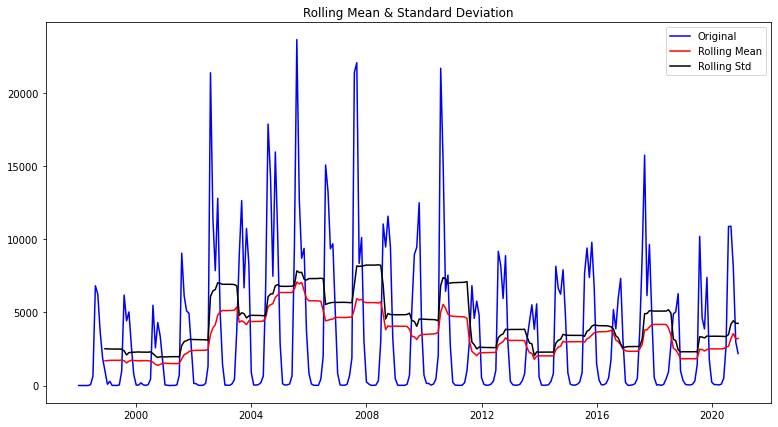

Results of Dickey-Fuller Test:
ADF                             -2.161114
P-value                          0.220660
#Lags Used                      11.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [92]:
#Testando se os dados de treino são estacionários - Pará
test_stationarity(base_PA['number'])

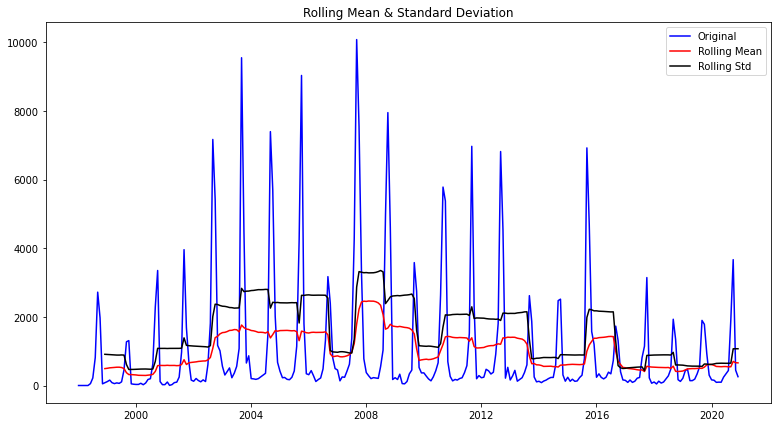

Results of Dickey-Fuller Test:
ADF                             -2.833091
P-value                          0.053700
#Lags Used                      13.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [93]:
#Testando se os dados de treino são estacionários - Bahia
test_stationarity(base_BA['number'])

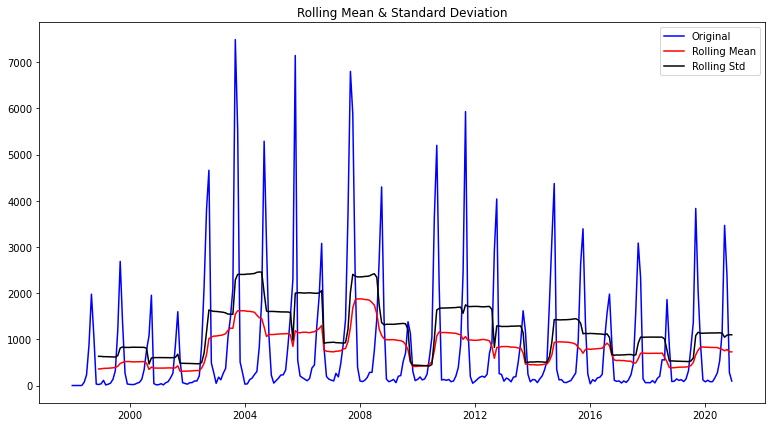

Results of Dickey-Fuller Test:
ADF                             -3.320669
P-value                          0.013979
#Lags Used                      13.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [94]:
#Testando se os dados de treino são estacionários - Minas Gerais
test_stationarity(base_MG['number'])

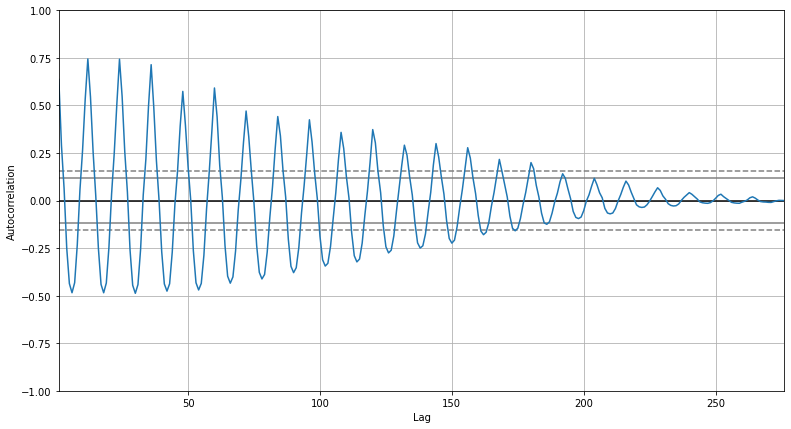

In [95]:
# Verificando Autocorrelação
from pandas.plotting import autocorrelation_plot

# autocorrelation plot 
autocorrelation_plot(base_PA['number'])
plt.show()

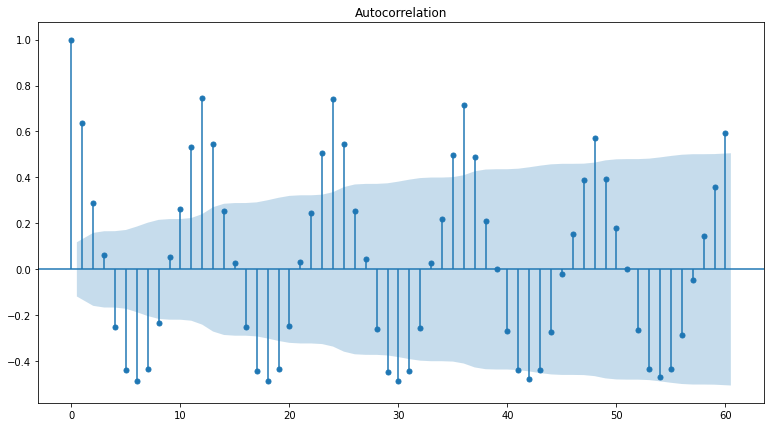

In [96]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(base_PA['number'], lags=60)
plt.show()

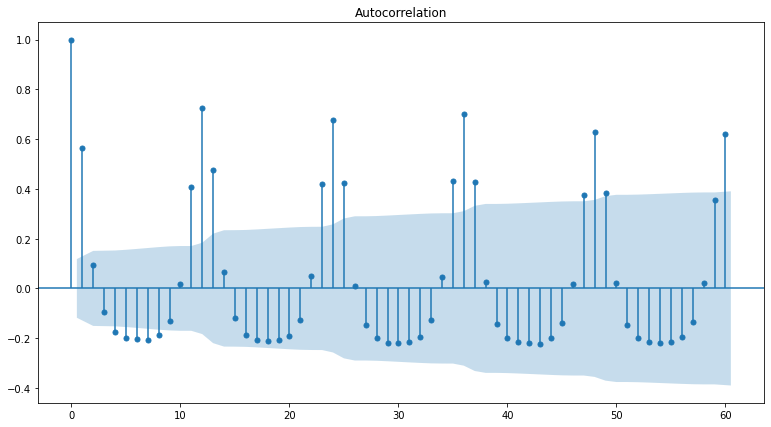

In [97]:
plot_acf(base_BA['number'], lags=60)
plt.show()

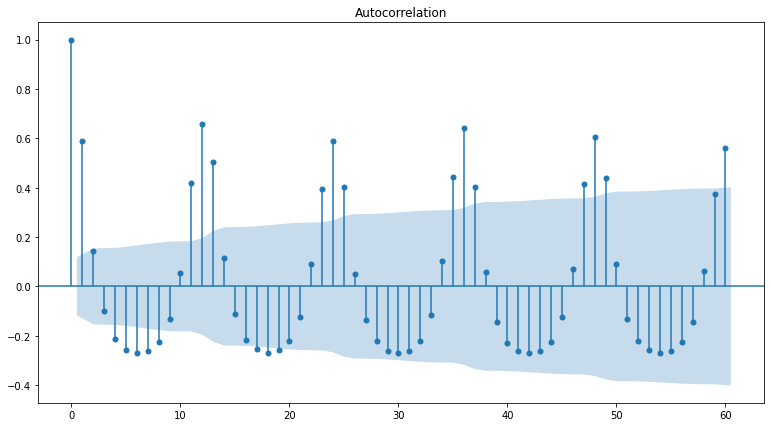

In [98]:
plot_acf(base_MG['number'], lags=60)
plt.show()

## ARIMA - PMDARIMA

Após tornar a série estacionária, é aplicado o modelo ARIMA para previsão. ARIMA é composto por 3 termos (Auto-Regressão + Integrado + Média Móvel) e estes componentes são representados pelos parâmetros **p**, **d** e **q**.

Para descobrir a melhor combinação de parâmetros, será utilizada a biblioteca **pmdarima**. Através da função auto_arima, ele utiliza pontuação AIC para descobrir o melhor modelo preditivo.

O modelo arima contém alguns parâmetros

**ARIMA(p,d,q)**
- **p**: O número de lags que foram devem ser incluídos no modelo.
- **d**: O número de vezes que as observações serão diferenciadas.
- **q**: O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

### Separando base de treino e teste

In [99]:
train_data_PA = base_PA['number'].loc['1998-01-01':'2019-12-01']
train_data_MG = base_MG['number'].loc['1998-01-01':'2019-12-01']
train_data_BA = base_BA['number'].loc['1998-01-01':'2019-12-01']

In [100]:
train_data_PA

data
1998-01-01        0
1998-02-01        0
1998-03-01        0
1998-04-01        0
1998-05-01        0
              ...  
2019-08-01    10185
2019-09-01     4618
2019-10-01     3870
2019-11-01     7390
2019-12-01     1745
Freq: MS, Name: number, Length: 264, dtype: int64

In [101]:
train_data_MG

data
1998-01-01       0
1998-02-01       0
1998-03-01       0
1998-04-01       0
1998-05-01       0
              ... 
2019-08-01    1369
2019-09-01    3833
2019-10-01    2049
2019-11-01     892
2019-12-01     118
Freq: MS, Name: number, Length: 264, dtype: int64

In [102]:
train_data_BA

data
1998-01-01       0
1998-02-01       0
1998-03-01       0
1998-04-01       0
1998-05-01       0
              ... 
2019-08-01     542
2019-09-01    1896
2019-10-01    1783
2019-11-01     924
2019-12-01     301
Freq: MS, Name: number, Length: 264, dtype: int64

In [103]:
test_data_PA = base_PA['number'].loc['2020-01-01':'2020-12-01']
test_data_MG = base_MG['number'].loc['2020-01-01':'2020-12-01']
test_data_BA = base_BA['number'].loc['2020-01-01':'2020-12-01']

### Aplicando PMDARIMA

In [104]:
import pmdarima as pmd

# Definição do modelo para as bases dos estados

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                                     start_p=1, start_q=1,
                                     max_p=3, max_q=3, m=12,
                                     start_P=0, seasonal=True,
                                     d=1, D=1, trace=True,
                                     error_action='ignore',  # don't want to know if an order does not work
                                     suppress_warnings=True,  # don't want convergence warnings
                                     stepwise=True)  # set to stepwise
    return autoarima_model

### Pará

In [105]:
# Treino do Modelo
model_PA = arimamodel(train_data_PA)
model_PA.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.57 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4849.193, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4738.819, Time=0.87 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4686.063, Time=1.20 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4790.227, Time=0.17 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4677.856, Time=1.56 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4698.242, Time=0.93 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=4663.844, Time=3.52 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4668.036, Time=4.67 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=4664.783, Time=9.31 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=9.28 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=4721.660, Time=1.64 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=11.28 sec
 ARIMA(0,1,2)(2,1,1)[12]             : AIC=inf, Time=8.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             :

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  264
Model:             SARIMAX(1, 1, 2)x(2, 1, [], 12)   Log Likelihood               -2315.312
Date:                             Sun, 11 Apr 2021   AIC                           4642.625
Time:                                     22:43:24   BIC                           4663.777
Sample:                                          0   HQIC                          4651.137
                                             - 264                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2275      0.209      1.090      0.276      -0.182       0.637
ma.L1         -0.8003      0.207     -3.858      0.000      -1.207      -0.394
ma.L2         -0.1439      0.180     -0.799      0.424      -0.497       0.209
ar.S.L12      -0.7715      0.032    -24.033      0.000      -0.834      -0.709
ar.S.L24      -0.3737      0.032    -11.776      0.000      -0.436      -0.311
sigma2      5.929e+06   2.48e+05     23.924      0.000    5.44e+06    6.42e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               598.30
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.73
Prob(H) (two-sided):                  0.02   Kurtosis:                        10.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Minas Gerais

In [106]:
# Treino do Modelo
model_MG = arimamodel(train_data_MG)
model_MG.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4297.854, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4204.500, Time=1.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.46 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4263.783, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4160.402, Time=3.16 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.05 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.91 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4181.837, Time=2.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4147.825, Time=4.38 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4193.610, Time=1.95 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=10.22 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=4.65 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=4142.485, Time=4.35 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=4188.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  264
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2065.243
Date:                            Sun, 11 Apr 2021   AIC                           4142.485
Time:                                    22:44:49   BIC                           4163.638
Sample:                                         0   HQIC                          4150.998
                                            - 264                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4182      0.039    -10.700      0.000      -0.495      -0.342
ar.L2         -0.3027      0.051     -5.929      0.000      -0.403      -0.203
ar.L3         -0.1706      0.076     -2.253      0.024      -0.319      -0.022
ar.S.L12      -0.6625      0.029    -22.533      0.000      -0.720      -0.605
ar.S.L24      -0.4098      0.034    -11.991      0.000      -0.477      -0.343
sigma2      8.085e+05   3.63e+04     22.282      0.000    7.37e+05     8.8e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               589.80
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Bahia

In [107]:
# Treino do Modelo
model_BA = arimamodel(train_data_BA)
model_BA.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.42 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4348.127, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4288.787, Time=0.76 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4226.984, Time=1.18 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4310.007, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4228.620, Time=1.34 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4228.406, Time=3.46 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4266.116, Time=1.26 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=11.37 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=4195.755, Time=3.61 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=inf, Time=4.12 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=inf, Time=7.74 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=inf, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  264
Model:             SARIMAX(0, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -2086.226
Date:                                 Sun, 11 Apr 2021   AIC                           4186.453
Time:                                         22:47:49   BIC                           4211.131
Sample:                                              0   HQIC                          4196.384
                                                 - 264                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5114      0.043    -11.898      0.000      -0.596      -0.427
ma.L2         -0.3178      0.092     -3.464      0.001      -0.498      -0.138
ma.L3         -0.1127      0.088     -1.279      0.201      -0.285       0.060
ar.S.L12      -0.6753      0.104     -6.519      0.000      -0.878      -0.472
ma.S.L12       0.0326      0.099      0.328      0.743      -0.162       0.227
ma.S.L24      -0.6928      0.060    -11.575      0.000      -0.810      -0.575
sigma2      9.167e+05   3.93e+04     23.328      0.000     8.4e+05    9.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               801.80
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             1.04
Prob(H) (two-sided):                  0.01   Kurtosis:                        11.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Teste

In [108]:
# Pará
prediction_PA = pd.DataFrame(model_PA.predict(n_periods = 12),index=test_data_PA.index)
prediction_PA.columns = ['predicted_numbers']
prediction_PA

,predicted_numbers
data,
2020-01-01,-553.517394
2020-02-01,-586.391448
2020-03-01,-517.700299
2020-04-01,-509.975816
2020-05-01,-441.427418
2020-06-01,-100.945430
2020-07-01,1545.495804
2020-08-01,6180.525693
2020-09-01,8346.384616


In [109]:
# Minas Gerais
prediction_MG = pd.DataFrame(model_MG.predict(n_periods = 12),index=test_data_MG.index)
prediction_MG.columns = ['predicted_numbers']
prediction_MG

,predicted_numbers
data,
2020-01-01,595.864529
2020-02-01,604.709039
2020-03-01,613.202670
2020-04-01,494.872414
2020-05-01,596.715524
2020-06-01,727.850633
2020-07-01,1076.467220
2020-08-01,1722.754148
2020-09-01,3490.947457


In [110]:
# Bahia
prediction_BA = pd.DataFrame(model_BA.predict(n_periods = 12),index=test_data_BA.index)
prediction_BA.columns = ['predicted_numbers']
prediction_BA

,predicted_numbers
data,
2020-01-01,23.839325
2020-02-01,-55.819092
2020-03-01,9.893728
2020-04-01,-181.252275
2020-05-01,-165.135157
2020-06-01,-85.244321
2020-07-01,51.336306
2020-08-01,520.370258
2020-09-01,3156.390221


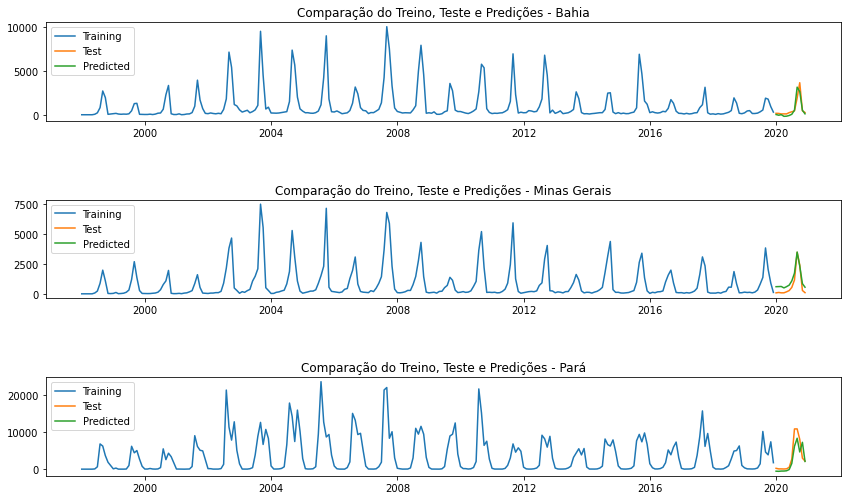

In [111]:
# Define as configurações dos plots
# Cada plot terá o mesmo tamanho de figuras (10,5)
#plt.style.use("ggplot")

plt.figure(1)

# Dados para cada subplot

plt.subplot(311)
plt.plot(train_data_BA,label="Training")
plt.plot(test_data_BA,label="Test")
plt.plot(prediction_BA,label="Predicted")
plt.legend(loc = 'upper left')
plt.title('Comparação do Treino, Teste e Predições - Bahia')

plt.subplot(312)
plt.plot(train_data_MG,label="Training")
plt.plot(test_data_MG,label="Test")
plt.plot(prediction_MG,label="Predicted")
plt.legend(loc = 'upper left')
plt.title('Comparação do Treino, Teste e Predições - Minas Gerais')

plt.subplot(313)
plt.plot(train_data_PA,label="Training")
plt.plot(test_data_PA,label="Test")
plt.plot(prediction_PA,label="Predicted")
plt.legend(loc = 'upper left')
plt.title('Comparação do Treino, Teste e Predições - Pará')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.8,
                    wspace=0.25)

plt.savefig("results.jpg")
plt.show()


In [86]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error

rmse_PA = sqrt(mean_squared_error(test_data_PA, prediction_PA))
print('Test RMSE - Pará: %.3f' % rmse_PA)

rmse_MG = sqrt(mean_squared_error(test_data_MG, prediction_MG))
print('Test RMSE - Minas Gerais: %.3f' % rmse_MG)

rmse_BA = sqrt(mean_squared_error(test_data_BA, prediction_BA))
print('Test RMSE - Bahia: %.3f' % rmse_BA)

Test RMSE - Pará: 2271.027
Test RMSE - Minas Gerais: 456.593
Test RMSE - Bahia: 498.144
